In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
     

In [ ]:
from datasets import load_dataset
imrad_data = load_dataset('saier/unarXive_imrad_clf')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/520053 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5001 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
imrad_data

DatasetDict({
    train: Dataset({
        features: ['_id', 'text', 'label'],
        num_rows: 520053
    })
    validation: Dataset({
        features: ['_id', 'text', 'label'],
        num_rows: 5001
    })
    test: Dataset({
        features: ['_id', 'text', 'label'],
        num_rows: 5000
    })
})

In [ ]:
import pandas as pd

imrad_train_df = pd.DataFrame(imrad_data['train'])


In [ ]:
imrad_train_df.head()

,_id,text,label
0,7b7f37ca-e70e-416d-927f-2fa3db62e3d5,Food recommendation has become an essential me...,i
1,0f83b85b-e18d-4055-b5aa-9bf7096c42cb,We introduce and discuss the FEO that extends ...,i
2,61d8f60a-917b-4807-87c2-5b7e5c07f0ae,Prior work has shown that users seek answers a...,w
3,13508314-3af5-446f-b353-7d1105b1ce8e,[1]} describe a system based on logical reason...,w
4,1587047b-085e-41aa-8e80-6481f716f583,We employ a task-based evaluation [1]} for our...,m


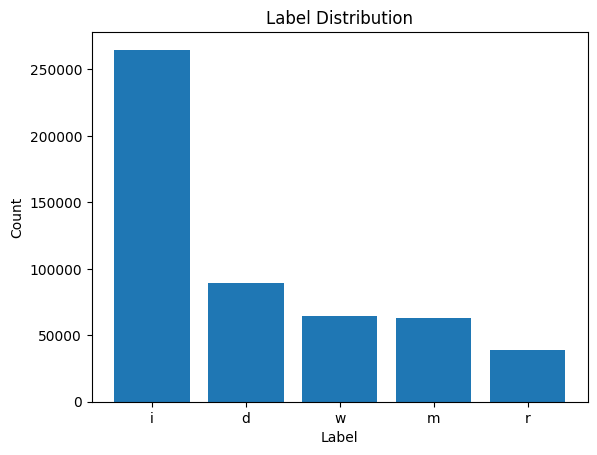

In [ ]:
import matplotlib.pyplot as plt

labels = imrad_train_df['label'].value_counts().index.to_list()
counts = imrad_train_df['label'].value_counts().to_list()

plt.bar(labels, counts)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.show()


In [ ]:
imrad_train_df = df_balanced
imrad_train_df.head()

,_id,text,label
0,dab1b3d2-6d0a-40d2-8789-c767de224ff6,"\nGrand Unification, spanning all of cognition...",i
1,be2c6e1c-c982-42ed-af4a-e674bb0e55c4,"Statistics. A snapshot of predictions, the nor...",r
2,01a49208-f0dc-4ab9-af7c-e0c9a413464b,In our experiments we perform imitation learni...,m
3,1173ecf0-c47b-4821-9028-7dec0aef2b8a,Word entropy is another method.\nIt was used i...,w
4,214a0528-b7a5-4907-9c80-740dca9b27c3,"As specified in section REF , our CWM models p...",m


# Cleaning And Balancing data.

In [ ]:
imrad_train_df.shape

(194070, 16)

In [ ]:
# prompt: filter any introduction containing non natural language characters

import re

def is_natural_language(text):
  return bool(re.match('^[a-zA-Z0-9\s.,!?;:"\'-]+$', text))

imrad_train_df_filtered = imrad_train_df[imrad_train_df['text'].apply(is_natural_language)]


In [ ]:
imrad_train_df_filtered.shape

(94258, 3)

In [ ]:
imrad_train_df = imrad_train_df_filtered

In [ ]:
imrad_train_df_filtered['label'].value_counts()

label
i    40343
d    35242
m     8681
w     5000
r     4992
Name: count, dtype: int64

In [ ]:
# prompt: create a balanced df for all labels ( take samples from choosen_df)

import pandas as pd
df_balanced = pd.DataFrame()

min_samples = min(imrad_train_df['label'].value_counts())

for label in imrad_train_df['label'].unique():
    df_class = imrad_train_df[imrad_train_df['label'] == label].sample(n=min_samples, random_state=42)
    df_balanced = pd.concat([df_balanced, df_class], axis=0)

# Shuffle the balanced dataframe
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced.head()

,_id,text,label
0,f7700f82-5425-4dcc-965f-13b20b13b19d,"We present two experiments, one small prelimin...",m
1,393fb8b1-5b1b-4ef0-8499-fd8303f84624,The two adversarial cases considered in this w...,m
2,a9aa6217-a201-4463-a5e6-08fe23bfc901,With modern technology having reached a stage ...,i
3,276590e3-98b1-4b78-b3b9-d3a3dd75c6cc,Systems are generally considered as complex if...,r
4,798d3d4c-278f-4749-a8b7-e2dbfd64e6e9,Near-infrared detection experimentation will h...,w


In [ ]:
df_balanced['label'].value_counts()

label
m    4992
i    4992
r    4992
w    4992
d    4992
Name: count, dtype: int64

In [ ]:
df_balanced.shape

(24960, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_balanced['label_int'] = encoder.fit_transform(df_balanced['label'])
df_balanced['label_int'].value_counts()

label_int
2    4992
1    4992
3    4992
4    4992
0    4992
Name: count, dtype: int64

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df_balanced['text'])



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = tfidf_matrix
y = df_balanced['label_int']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=100000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))

Accuracy: 0.6378205128205128
              precision    recall  f1-score   support

           0       0.63      0.66      0.64       980
           1       0.58      0.53      0.56      1012
           2       0.61      0.61      0.61       999
           3       0.68      0.68      0.68      1030
           4       0.68      0.71      0.69       971

    accuracy                           0.64      4992
   macro avg       0.64      0.64      0.64      4992
weighted avg       0.64      0.64      0.64      4992



In [ ]:
df_balanced.to_csv('/content/drive/MyDrive/master_files/data_preprocessed.csv')